<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/PulseAmplitudeModulation_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers the following topics:
1. The sampling theorem: signal sampling and reconstruction.
2. Time division multiplexing TDM.

# Python Libraries and Constructing Filters

Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

**Signal Reconstruction (LPF)**: Now we will use Low Pass filter to reconstruct the message signal from the samples. Let us define a Butterworth Low Pass filter with Bandwidth equal to $f_{3dB}$.

In [2]:
#f3db : cut-off frequency
#forder: order of the filter
from scipy import signal
def func_filter(rt,f3db,Tstep,forder):
    fs=1/Tstep
    nyq = 0.5 * fs
    normal_cutoff = f3db / nyq
    print(normal_cutoff)
    b, a = signal.butter(forder, normal_cutoff, btype='low', analog=False)
    y = signal.lfilter(b, a, rt)
    return y

Let us plot the frequency response of the LPF

0.2


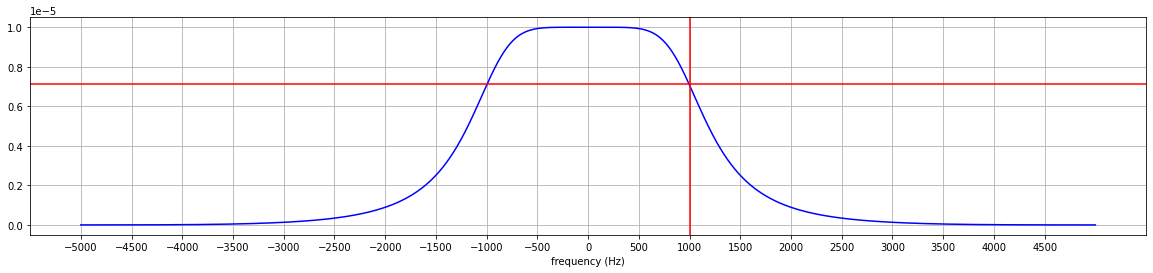

In [3]:
# LPF parameters 
f3db = 1000  # Cut-off frequency of the filter
forder=3 # order of the filter

Tstart=0
Tstop=10
Tstep=1e-4 
t = np.arange(Tstart,Tstop,Tstep)

L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output = func_filter(impls,f3db,Tstep,forder)

## plot the transfer function of the filter
N=len(t)           
FILTER_OUTPUT = np.abs(np.fft.fft(Filter_output))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT=FILTER_OUTPUT[idx]/N
plt.figure(figsize=(20,4))
plt.plot(freqs, FILTER_OUTPUT,'b')
plt.xlabel('frequency (Hz)')
xticks = np.arange(np.min(freqs), np.max(freqs), 500)
plt.xticks(xticks)
plt.grid()
plt.axvline(f3db, color='r')
plt.axhline(np.max(FILTER_OUTPUT)/1.4, color='r')


# The Sampling Theorem

As expected, the frequency response represent a Low Pass filter with cut-off at $f_{3dB}$. 

In this section we will sample three cosine signals with different bandwidths ($f_m$) to see the relation between the signal frequency $f_m$ and the sampling frequency $f_s$. 
We will start with $f_s> 2W$, then $f_s=2W$, and finally $f_s<2W$ 

**Case 1:** $f_S>2W$

Let us plot the message signal $m(t) = 1* \cos(2\pi (10) t)$.

$f_m$ = 10 while $f_s=100$ which means that $f_s >2f_m$  

(0.0, 1.0)

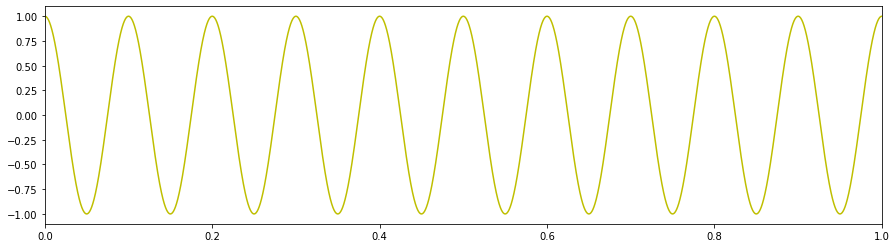

In [4]:
Tstart=0
Tstop=10
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=100    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # length of period

fm1=10    # frequency of message signal
Am1=1    # amplitude of message signal
mt1=Am1*np.cos(2 * np.pi * fm1* t) # message signal
plt.figure(figsize=(15,4))
plt.plot(t,mt1,'y')
plt.xlim(0,1)

Let us plot the sampled signal in the time domain

(0.0, 1.0)

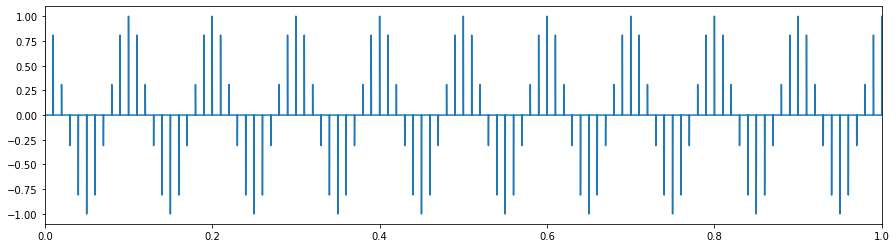

In [5]:
impls=np.zeros(L) # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal1= impls*mt1 # sample the message signal

plt.figure(figsize=(15,4))  # plot the sampled signal
plt.plot(t, mtIdeal1)
plt.xlim(0,1)

Now we will plot the message signal and the sampled signal in the frequency

No handles with labels found to put in legend.


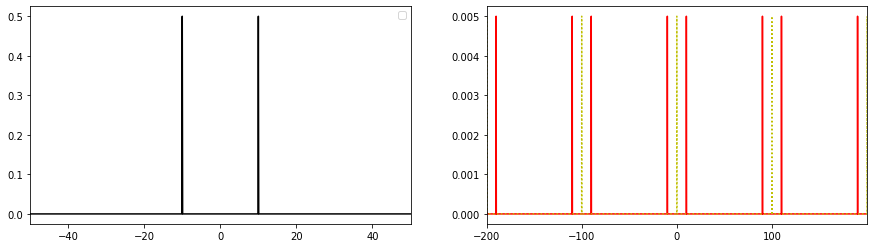

In [6]:
f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MF1 = np.abs(np.fft.fft(mt1))   # message signal in frequency domain with bandwidth fm=W=10. or 2W=20
freqs = np.fft.fftfreq(mt1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF1=MF1[idx]/N
ax1.plot(freqs, MF1,'k')
ax1.set_xlim(-50,50)
ax1.legend()


N=len(t)
SF1 = np.abs(np.fft.fft(mtIdeal1))
freqs = np.fft.fftfreq(mtIdeal1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF1=SF1[idx]/N
ax2.plot(freqs, SF1,'r')
ax2.set_xlim(-200,200)
a=list(range(-200,200,fs))  # to add markers on the figure at integer multiples of f
ax2.set_xticks(a) 

IMP = np.abs(np.fft.fft(impls))   # to draw lines at n*fs
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
ax2.plot(freqs, 0.5*IMP,'y:')

**Signal Reconstruction (ideal filter)**

Now we will use **ideal LPF** with $f_{cut-off}=f_m$ to reconstruct the original signal

0.01


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


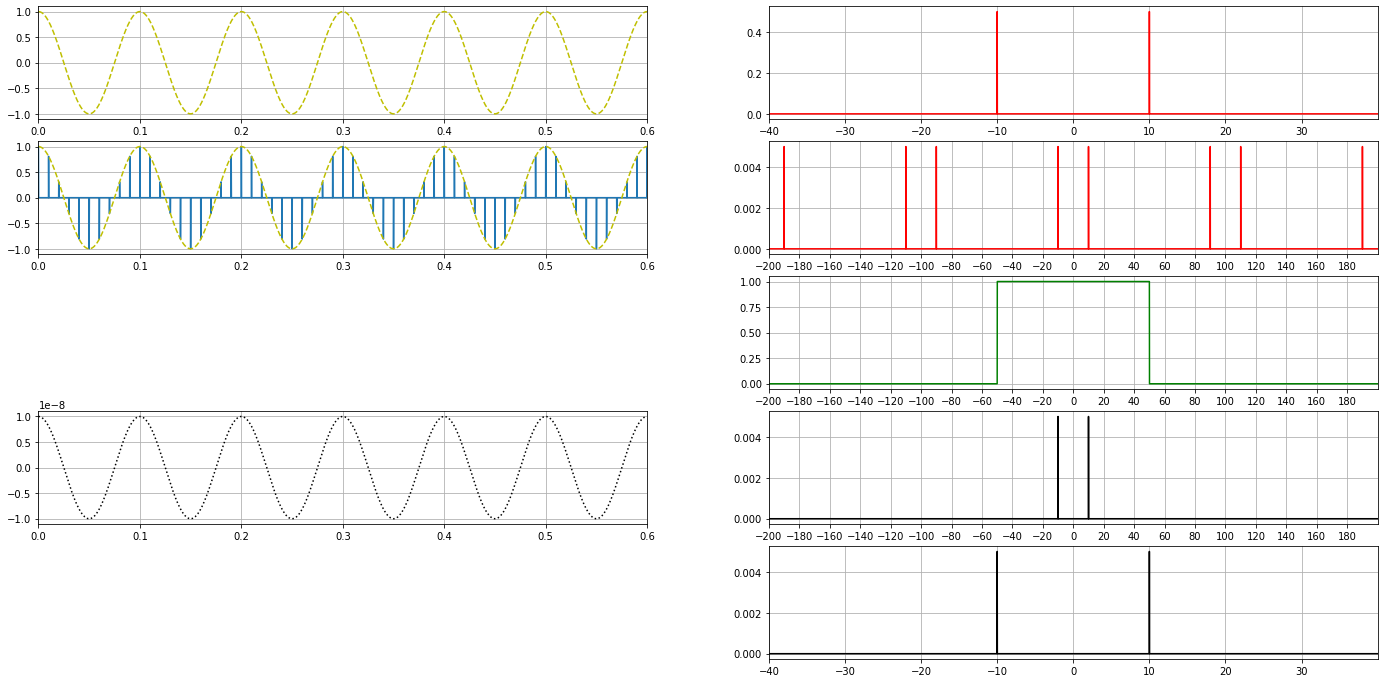

In [7]:
## Parameters of message signal
fm=10    # frequency of message signal (1)
Am=1    # amplitude of message signal (1)

## sampling parameters
fs=100    # frequency of the periodic pulse train 

# Ideal LPF parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

## Reconstruction using LPF
mtIdeal_reconstructed = func_filter(mtIdeal,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)

ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

##original message in the time domain
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()

##Original Signal in the frequency domain
N=len(t)
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()

##Sampled Signal in the frequency domain
N=len(t)   
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Ideal Filter frequency response
ifilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    ifilter[i] = 1

## plot the frequency response of the filter
ax6.plot(freqs, ifilter,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax6.set_xticks(xticks)
ax6.grid()


## Reconstructed Signal in the frequency domain
SF=SF*ifilter
ax8.plot(freqs, SF.real,'k')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax8.set_xticks(xticks)
ax8.grid()

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SF)
i=range(0,len(t),2)
ax7.plot(t[i], mtIdeal_reconstructed[i],'k:')
ax7.set_xlim(0,6/fm)
ax7.grid()


ax10.plot(freqs, SF,'k')
ax10.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax10.set_xticks(xticks)
ax10.grid()


**Case 2:** $f_s=2W$

Let us plot the message signal $m(t) = 1* \cos(2\pi (50) t)$.

$f_m$ = 50 while $f_s=100$ which means that $f_s =2f_m$  

(0.0, 1.0)

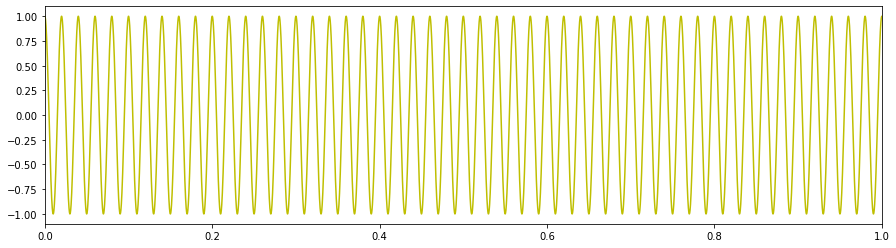

In [8]:
Tstart=0
Tstop=10
Tstep=1e-4 
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=100    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # period length

fm2=50    # frequency of message signal
Am2=1    # amplitude of message signal
mt2=Am2*np.cos(2 * np.pi * fm2* t) # message signal
plt.figure(figsize=(15,4))
plt.plot(t,mt2,'y')
plt.xlim(0,1)

Let us plot the sampled signal in the time domain

(0.0, 1.0)

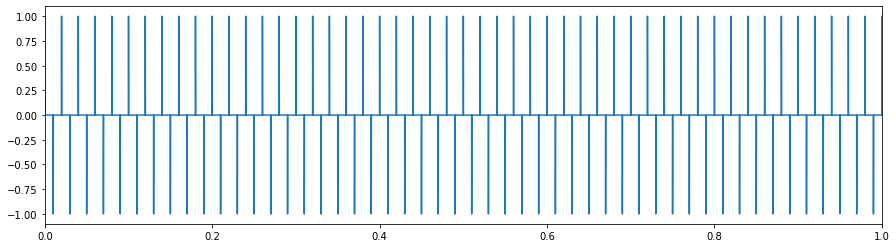

In [9]:
impls=np.zeros(L) # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal2= impls*mt2 # sample the message signal

plt.figure(figsize=(15,4))
plt.plot(t,mtIdeal2)
plt.xlim(0,1)

Now we will plot the message signal and the sampled signal in the frequency

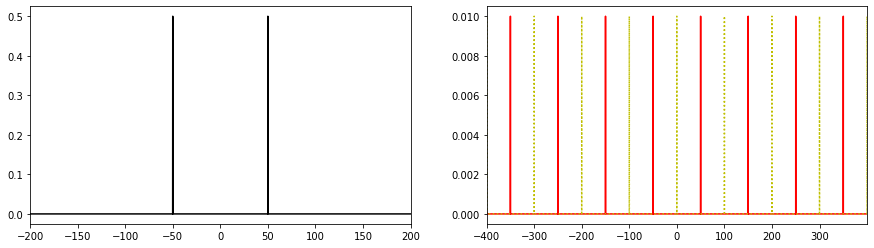

In [10]:
f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MF2 = np.abs(np.fft.fft(mt2))   # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF2=MF2[idx]/N
ax1.plot(freqs, MF2,'k')
ax1.set_xlim(-200,200)

N=len(t)
SF2 = np.abs(np.fft.fft(mtIdeal2))
freqs = np.fft.fftfreq(mtIdeal2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF2=SF2[idx]/N
ax2.plot(freqs, SF2,'r')
ax2.set_xlim(-400,400)
a=list(range(-400,400,fs))  # to add markers on the figure at integer multiples of f
ax2.set_xticks(a) 

IMP = np.abs(np.fft.fft(impls))   # to draw lines at n*fs
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
ax2.plot(freqs, IMP,'y:')

**Signal Reconstruction (ideal filter)**

Now we will use **ideal LPF** with $f_{cut-off}=f_m$ to reconstruct the original signal

0.01


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


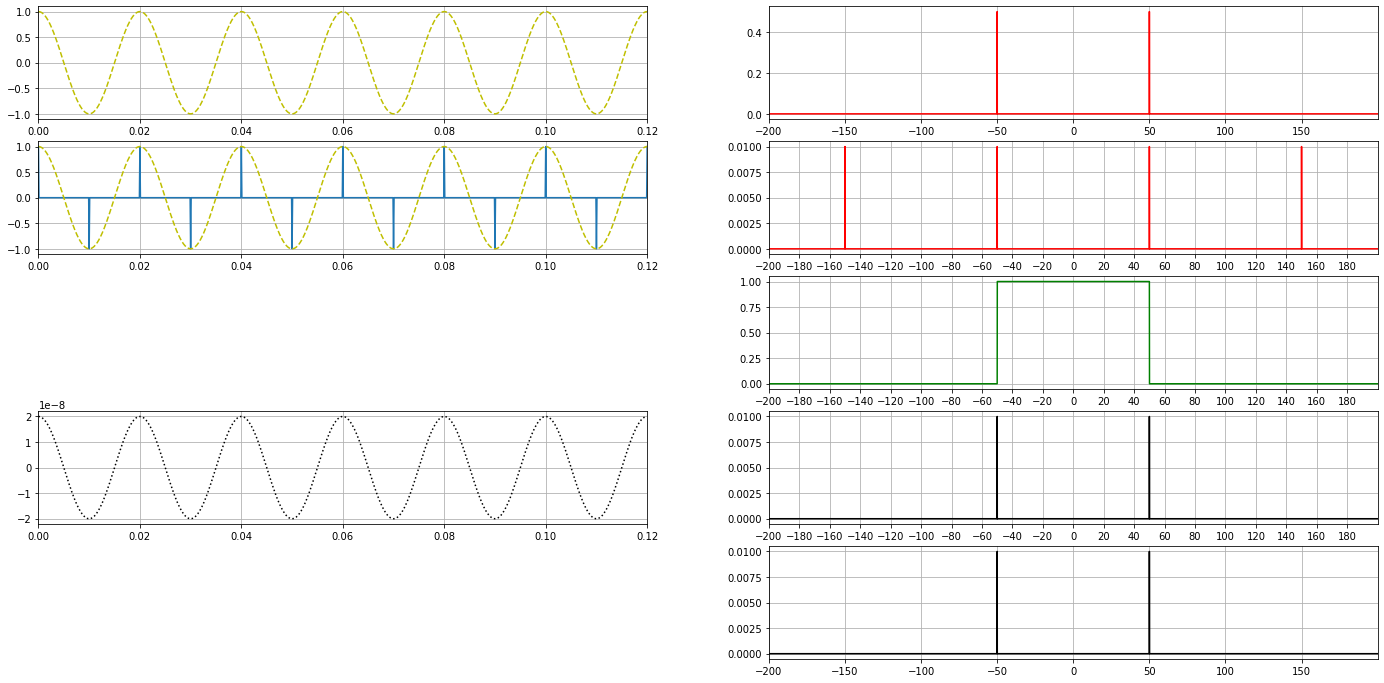

In [11]:
## Parameters of message signal
fm=50    # frequency of message signal (1)
Am=1    # amplitude of message signal (1)

## sampling parameters
fs=100    # frequency of the periodic pulse train 

# Ideal LPF parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

## Reconstruction using LPF
mtIdeal_reconstructed = func_filter(mtIdeal,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

##original message in the time domain
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()

##Original Signal in the frequency domain
N=len(t)
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()

##Sampled Signal in the frequency domain
N=len(t)   
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Ideal Filter frequency response
ifilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    ifilter[i] = 1

## plot the frequency response of the filter
ax6.plot(freqs, ifilter,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax6.set_xticks(xticks)
ax6.grid()


## Reconstructed Signal in the frequency domain
SF=SF*ifilter
ax8.plot(freqs, SF.real,'k')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax8.set_xticks(xticks)
ax8.grid()

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SF)
i=range(0,len(t),2)
ax7.plot(t[i], mtIdeal_reconstructed[i],'k:')
ax7.set_xlim(0,6/fm)
ax7.grid()


ax10.plot(freqs, SF,'k')
ax10.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax10.set_xticks(xticks)
ax10.grid()


**Case 3:** $f_s<2W$

Let us plot the message signal $m(t) = 1* \cos(2\pi (80) t)$.

$f_m$ = 80 while $f_s=100$ which means that $f_s <2f_m$  

(0.0, 1.0)

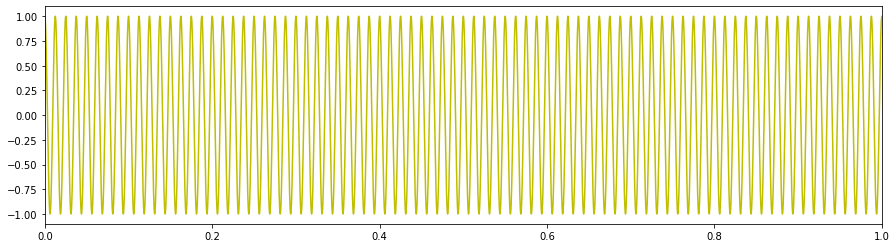

In [12]:
Tstart=0
Tstop=10
Tstep=1e-4 
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the time sequence

fs=100    # frequency of the periodic pulse train 
lenTs= int(1/(fs*Tstep))   # period length

fm3=80    # frequency of message signal
Am3=1    # amplitude of message signal
mt3=Am3*np.cos(2 * np.pi * fm3* t) # message signal

plt.figure(figsize=(15,4))
plt.plot(t,mt3,'y')
plt.xlim(0,1)

Let us plot the sampled signal in the time domain

(0.0, 1.0)

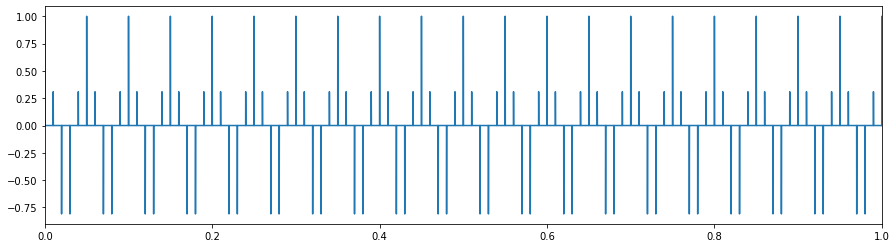

In [13]:
impls=np.zeros(L) # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal3= impls*mt3 # sample the message signal

plt.figure(figsize=(15,4))
plt.plot(t,mtIdeal3)
plt.xlim(0,1)

Now we will plot the message signal and the sampled signal in the frequency

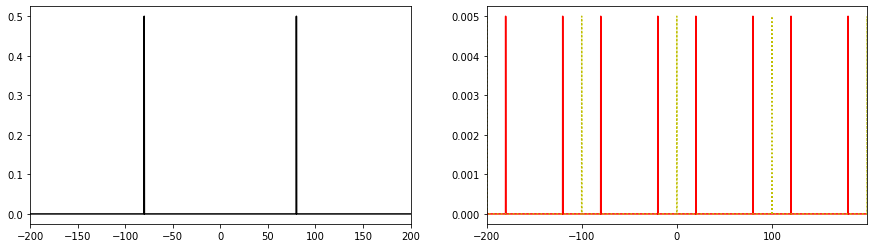

In [14]:
f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

N=len(t)         
MF3 = np.abs(np.fft.fft(mt3))   # message signal in frequency domain with bandwidth W=5. or 2W=10
freqs = np.fft.fftfreq(mt3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MF3=MF3[idx]/N
ax1.plot(freqs, MF3,'k')
ax1.set_xlim(-200,200)

N=len(t)
SF3 = np.abs(np.fft.fft(mtIdeal3))
freqs = np.fft.fftfreq(mtIdeal3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF3=SF3[idx]/N
ax2.plot(freqs, SF3,'r')
ax2.set_xlim(-200,200)
a=list(range(-200,200,fs))  # to add markers on the figure at integer multiples of f
ax2.set_xticks(a) 

IMP = np.abs(np.fft.fft(impls))   # to draw lines at n*fs
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
IMP=IMP[idx]/N
ax2.plot(freqs, 0.5*IMP,'y:')

**Signal Reconstruction (ideal filter)**

Now we will use **ideal LPF** with $f_{cut-off}=f_m$ to reconstruct the original signal

0.01


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


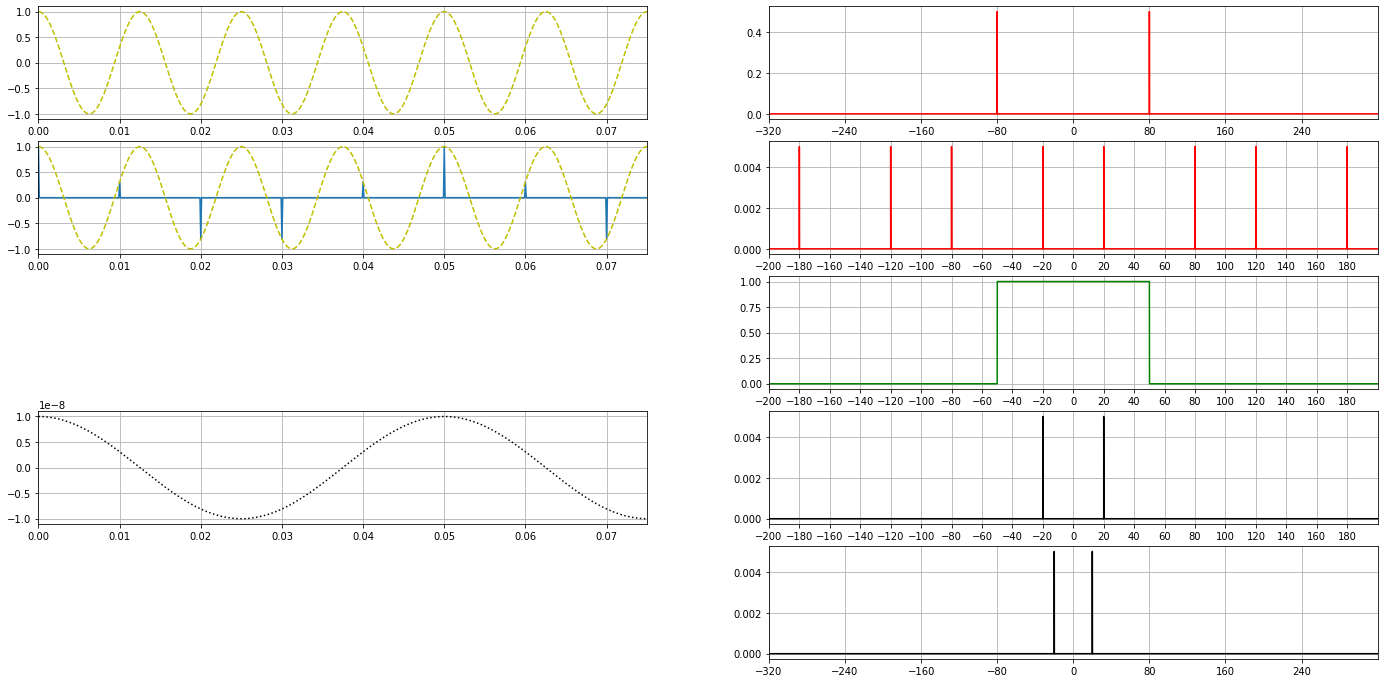

In [15]:
## Parameters of message signal
fm=80    # frequency of message signal (1)
Am=1    # amplitude of message signal (1)

## sampling parameters
fs=100    # frequency of the periodic pulse train 

# Ideal LPF parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

## Reconstruction using LPF
mtIdeal_reconstructed = func_filter(mtIdeal,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

##original message in the time domain
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()

##Original Signal in the frequency domain
N=len(t)
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()

##Sampled Signal in the frequency domain
N=len(t)   
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Ideal Filter frequency response
ifilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    ifilter[i] = 1

## plot the frequency response of the filter
ax6.plot(freqs, ifilter,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax6.set_xticks(xticks)
ax6.grid()


## Reconstructed Signal in the frequency domain
SF=SF*ifilter
ax8.plot(freqs, SF.real,'k')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax8.set_xticks(xticks)
ax8.grid()

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SF)
i=range(0,len(t),2)
ax7.plot(t[i], mtIdeal_reconstructed[i],'k:')
ax7.set_xlim(0,6/fm)
ax7.grid()


ax10.plot(freqs, SF,'k')
ax10.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax10.set_xticks(xticks)
ax10.grid()


**Excercise** Compare the last three results. What do you conclude?

# Sampling of a Multitone Message Signal

Let us apply the sampling theorem to the multitone message signal $m(t)=A_{m1}cos(2 \pi f_{m1}t)+A_{m2}cos(2 \pi f_{m2}t)+A_{m3}cos(2 \pi f_{m3}t)$

0.02


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


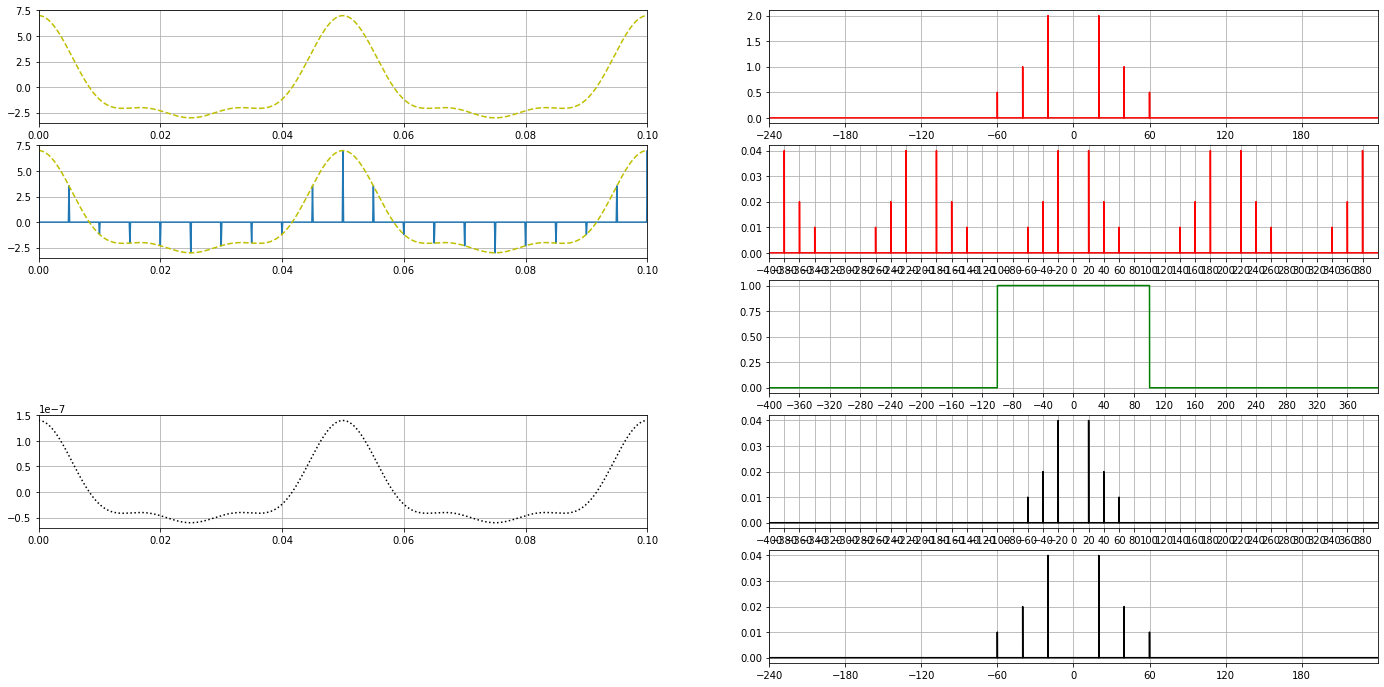

In [33]:
## Parameters of message signal
fm1=20    # frequency of message signal (1)
Am1=4    # amplitude of message signal (1)

fm2=40    # frequency of message signal (2)
Am2=2    # amplitude of message signal (2)

fm3=60    # frequency of message signal (3)
Am3=1    # amplitude of message signal (3)

## Sampling Parameters
fs=200    # frequency of the periodic pulse train 

# Ideal LPF Parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Sampling of m(t)
Tstart=0
Tstop=100
Tstep=1e-4  
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length

fm= max(fm1,fm2,fm3);

mt=Am1*np.cos(2 * np.pi * fm1* t)+Am2*np.cos(2 * np.pi * fm2* t)+Am3*np.cos(2 * np.pi * fm3* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

## Reconstruction using LPF
mtIdeal_reconstructed = func_filter(mtIdeal,f3db,Tstep,forder)

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax10 = f.add_subplot(5,2,10)

##original message in the time domain
ax1.plot(t,mt,'y--')
ax1.set_xlim(0,6/fm)
ax1.grid()

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal, t,mt,'y--')
ax3.set_xlim(0,6/fm)
ax3.grid()

##Original Signal in the frequency domain
N=len(t)
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()

##Sampled Signal in the frequency domain
N=len(t)   
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()

## Ideal Filter frequency response
ifilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    ifilter[i] = 1

## plot the frequency response of the filter
ax6.plot(freqs, ifilter,'g')
ax6.set_xlabel('frequency (Hz)')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax6.set_xticks(xticks)
ax6.grid()


## Reconstructed Signal in the frequency domain
SF=SF*ifilter
ax8.plot(freqs, SF.real,'k')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax8.set_xticks(xticks)
ax8.grid()

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SF)
i=range(0,len(t),2)
ax7.plot(t[i], mtIdeal_reconstructed[i],'k:')
ax7.set_xlim(0,6/fm)
ax7.grid()


ax10.plot(freqs, SF,'k')
ax10.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax10.set_xticks(xticks)
ax10.grid()


# Time Division Multiplexing

In this section we will time-multiplex two signals. The first signal single tone and the second signal is a square wave.
Let us plot the signals

(0.0, 1.0)

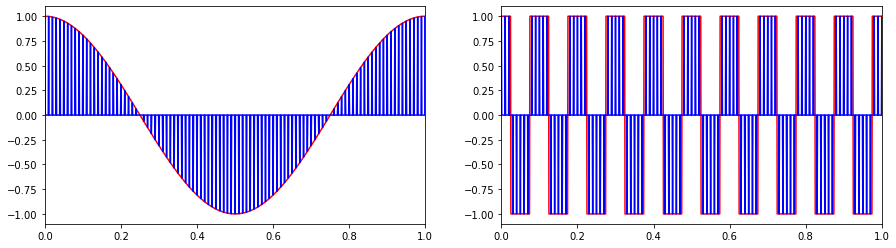

In [54]:
Tstart=0
Tstop=10
Tstep=1e-3
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
N=2 # data rate of TDM line to the data rate of individual lines (number of multiplexed signals)

## First message signal
fm=1    # frequency of the first message signal
Am=1    # amplitude of the first message signal
mt1=Am*np.cos(2 * np.pi * fm* t) # the first message signal is sinusoidal

## Second message signal
dty=0.5     # duty cycle of the square wave
f=10        # frequency of the square wave
mt2=signal.square(2 * np.pi * f * t +np.pi*dty, duty=dty) 

#mt2=np.ones(L)    # second message signal is all ones


fs=100    # frequency of the periodic impulse train
lenTs= int(1/(fs*Tstep))   # period lengthS
impls=np.zeros(L)     # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal1= impls*mt1   # sampling the first signal
mtIdeal2=impls*mt2    # sampling the second signal

f = plt.figure(figsize=(15,4))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(t, mt1,'r',t,mtIdeal1,'b')
ax1.set_xlim(0,1)

ax2.plot(t, mt2,'r',t,mtIdeal2,'b')
ax2.set_xlim(0,1)

Let us multiplex the two signals

(0.0, 0.4)

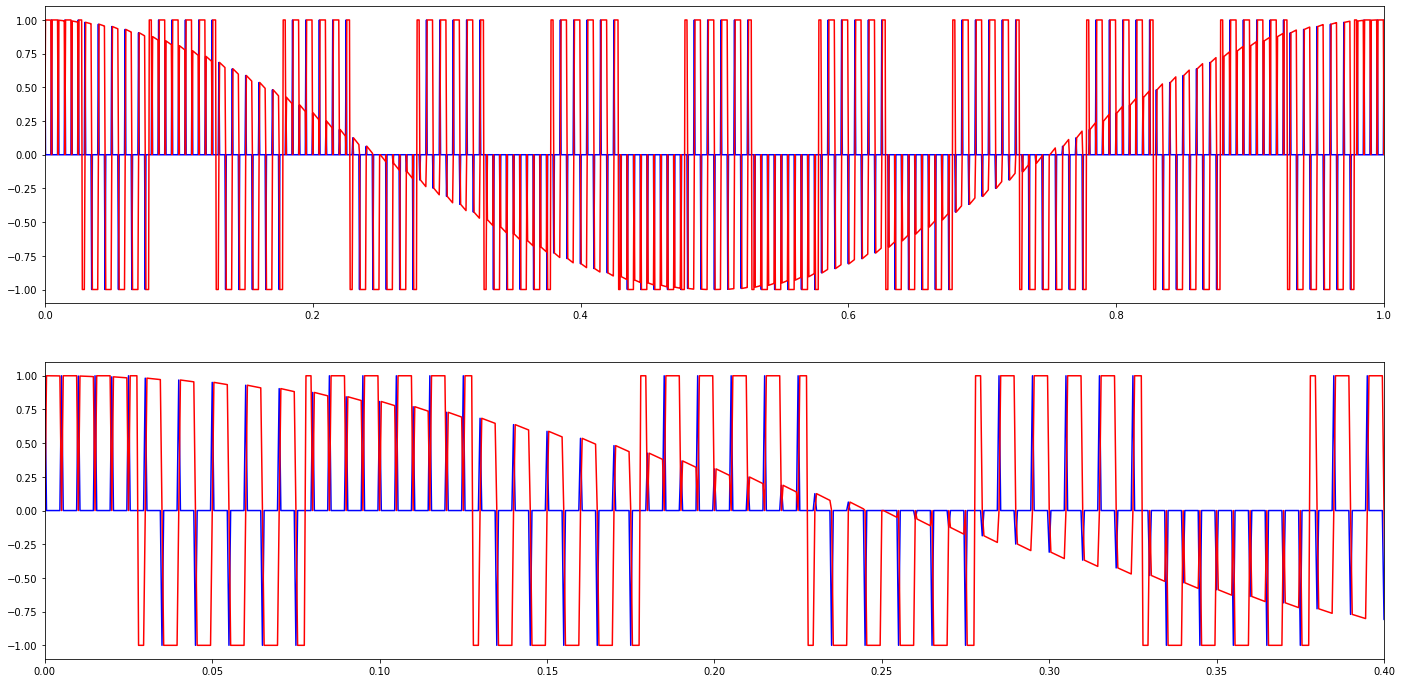

In [55]:
# TDM
Nsamp=int(1*lenTs)    #number of samples taken from each signal mtideal1, mtideal2

tline=np.arange(Tstart,Tstop,Tstep/N) # rate at the output of the TDM is N*rate of the multiplexed lines
TDMline= np.zeros(len(tline))
indx=0
for samp in range (0,L,N*Nsamp):    #multiplexing the two signals
    TDMline[samp:samp+Nsamp-1]=mtIdeal1[indx:indx+Nsamp-1]
    TDMline[samp+Nsamp:samp+2*Nsamp-1]=mtIdeal2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

# the following code plots the TDM of the message signals (unsampled) to clarify the envelope of the signals
indx=0     
envTDMline= np.zeros(len(tline))
for samp in range (1,L,N*Nsamp):    #multiplexing
    envTDMline[samp:samp+Nsamp-1]=mt1[indx:indx+Nsamp-1]
    envTDMline[samp+Nsamp:samp+2*Nsamp-1]=mt2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

## plot the TDMA signal
f = plt.figure(figsize=(24,12))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(tline, TDMline,'b',tline, envTDMline,'r')
ax1.set_xlim(0,1)

ax2.plot(tline, TDMline,'b',tline, envTDMline,'r')
ax2.set_xlim(0,0.4)

As another example we will time-multiplex two single tone signals (a cosine and a sine).

(0.0, 0.4)

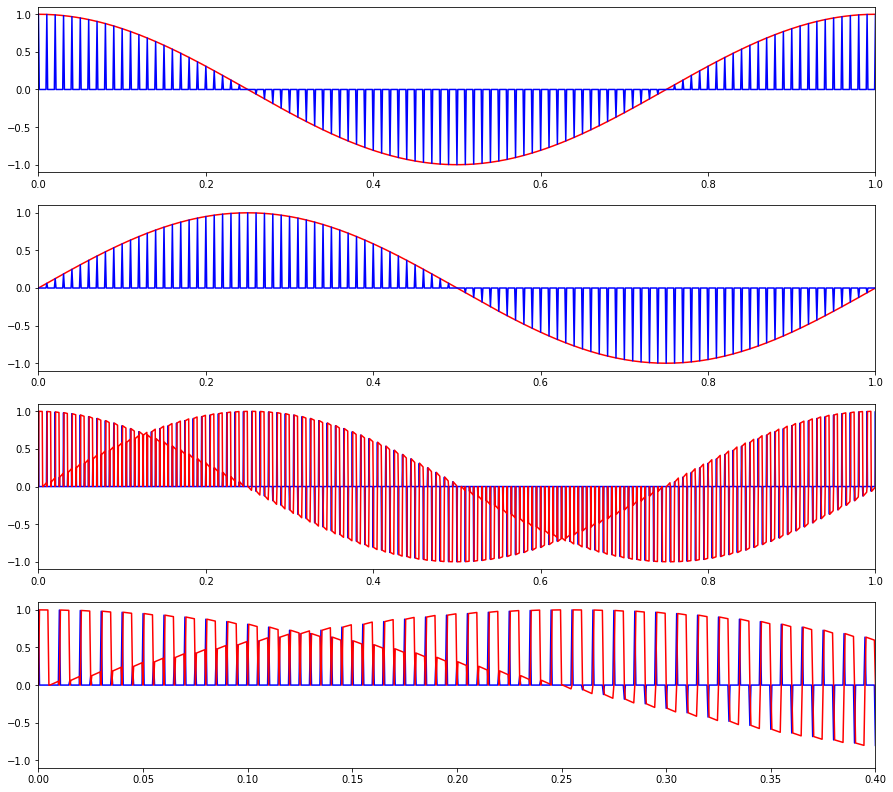

In [59]:
Tstart=0
Tstop=10
Tstep=1e-3
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
N=2 # data rate of TDM line to the data rate of individual lines (number of multiplexed signals)

## First message signal
fm=1    # frequency of the first message signal
Am=1    # amplitude of the first message signal
mt1=Am*np.cos(2 * np.pi * fm* t) # the first message signal is sinusoidal

## Second message signal
dty=0.5     # duty cycle of the square wave
f=10        # frequency of the square wave
mt2=Am*np.sin(2 * np.pi * fm* t)

#mt2=np.ones(L)    # second message signal is all ones


fs=100    # frequency of the periodic impulse train
lenTs= int(1/(fs*Tstep))   # period lengthS
impls=np.zeros(L)     # impulse train
for i in  range (0, L,lenTs):
    impls[i]=1

mtIdeal1= impls*mt1   # sampling the first signal
mtIdeal2=impls*mt2    # sampling the second signal

f = plt.figure(figsize=(15,14))  # plot the message signal and the sampled signal in the frequency domain
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)


ax1.plot(t, mt1,'r',t,mtIdeal1,'b')
ax1.set_xlim(0,1)

ax2.plot(t, mt2,'r',t,mtIdeal2,'b')
ax2.set_xlim(0,1)

# TDM
Nsamp=int(1*lenTs)    #number of samples taken from each signal mtideal1, mtideal2

tline=np.arange(Tstart,Tstop,Tstep/N) # rate at the output of the TDM is N*rate of the multiplexed lines
TDMline= np.zeros(len(tline))
indx=0
for samp in range (0,L,N*Nsamp):    #multiplexing the two signals
    TDMline[samp:samp+Nsamp-1]=mtIdeal1[indx:indx+Nsamp-1]
    TDMline[samp+Nsamp:samp+2*Nsamp-1]=mtIdeal2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

# the following code plots the TDM of the message signals (unsampled) to clarify the envelope of the signals
indx=0     
envTDMline= np.zeros(len(tline))
for samp in range (1,L,N*Nsamp):    #multiplexing
    envTDMline[samp:samp+Nsamp-1]=mt1[indx:indx+Nsamp-1]
    envTDMline[samp+Nsamp:samp+2*Nsamp-1]=mt2[indx:indx+Nsamp-1]
    indx=indx+Nsamp

ax3.plot(tline, TDMline,'b',tline, envTDMline,'r')
ax3.set_xlim(0,1)

ax4.plot(tline, TDMline,'b',tline, envTDMline,'r')
ax4.set_xlim(0,0.4)

